In [1]:
import pandas as pd
import numpy as np
from utilsPtBr import Utils
import re

dataPath = 'data/shortCorpus2.csv'
dataFullPath = 'data/halfCorpus.csv'
df_uf = pd.read_csv(dataPath, sep=';')
df_full = pd.read_csv(dataFullPath, sep=';')
util = Utils()

In [2]:
dictDataframeTreino = {
    "tag": [],
    "text": [],
}

dictDataframeTeste = {
    "tag": [],
    "text": [], 
}

dictDataframeWithoutAnothersTreino = {
    "tag": [],
    "text": [],
}

dictDataframeWithoutAnothersTeste = {
    "tag": [],
    "text": [], 
}

dictFullframeTeste = {
    "tag": [],
    "text": [], 
}
dictFullWithoutAnothersframeTeste = {
    "tag": [],
    "text": [], 
}
formatTag = {
    "Publicação - Despacho / Decisão": 1,
    "Publicação - Sentença": 2,
    "Publicação - Audiência": 3,
}


In [3]:
from random import randint
def calcTestLineAleatory():
    numberAleatory = randint(0,99);
    if numberAleatory % 9 == 1: 
        return True;
    return False;

In [4]:
# pre formatando texto e separando treino e teste
vocabulary = {
    'UNKNOWN': 'UNKNOWN'
}

for i in range (len(df_uf.index)):
    tag = df_uf.loc[i].iloc[1]
    tag = formatTag.get(tag, 0)
  
    text = df_uf.loc[i].iloc[2]
    tokens = util.tokenize(text)
    for tok in set(tokens):
        if bool(re.search(r'\d', tok)):
            vocabulary['NUMBER'] = tok
        else:  
            vocabulary[tok] = tok
    #freq = util.getPropoFreq(tokens)
  
    if calcTestLineAleatory():
        dictDataframeTeste['tag'].append(tag)
        dictDataframeTeste['text'].append(tokens)
    else:
        dictDataframeTreino['tag'].append(tag)
        dictDataframeTreino['text'].append(tokens)
    if tag != 0:
        if calcTestLineAleatory():
            dictDataframeWithoutAnothersTeste['tag'].append(tag)
            dictDataframeWithoutAnothersTeste['text'].append(tokens)
        else:
            dictDataframeWithoutAnothersTreino['tag'].append(tag)
            dictDataframeWithoutAnothersTreino['text'].append(tokens)     



In [5]:
vocabulary["UNKNOWN"] = "UNKNOWN"
print('size of vocanulary is ' + str(len(vocabulary.keys())) + ' words!')

word2index = {}
def get_word_2_index(vocab):
    for i,word in enumerate(vocab):
        if any(char.isdigit() for char in tok):
            word2index['NUMBER'] = i 
        else: 
            word2index[word] = i
    return word2index

word2index = get_word_2_index(vocabulary.keys())

print(word2index["UNKNOWN"])
def text_to_vector(tokens):
    totalUnknow = 0;
    layer = np.zeros(len(vocabulary.keys()),dtype=float)
    for word in tokens:
        index = word2index.get(word, word2index["UNKNOWN"])
        
        if any(char.isdigit() for char in word):
            index = word2index["NUMBER"]

        layer[index] += 1
        if index ==  word2index["UNKNOWN"]:
            totalUnknow += 1
#    if(totalUnknow> 0):        
#        print('total de palavras desconhecidas no vocabulario: ' + str(totalUnknow))
    return layer

size of vocanulary is 27817 words!
0


In [6]:
textsTreino = []
tagsTreino = []
textsTest = []
tagsTest = []
textsWOTreino = []
tagsWOTreino = []
textsWOTest = []
tagsWOTest = []

for i in range (len(dictDataframeTreino['text'])):
    textsTreino.append(text_to_vector(dictDataframeTreino['text'][i]))
    tagsTreino.append(dictDataframeTreino['tag'][i])

for i in range (len(dictDataframeTeste['text'])):
    textsTest.append(text_to_vector(dictDataframeTeste['text'][i]))
    tagsTest.append(dictDataframeTeste['tag'][i])

for i in range (len(dictDataframeWithoutAnothersTreino['text'])):
    textsWOTreino.append(text_to_vector(dictDataframeWithoutAnothersTreino['text'][i]))
    tagsWOTreino.append(dictDataframeWithoutAnothersTreino['tag'][i])

for i in range (len(dictDataframeWithoutAnothersTeste['text'])):
    textsWOTest.append(text_to_vector(dictDataframeWithoutAnothersTeste['text'][i]))
    tagsWOTest.append(dictDataframeWithoutAnothersTeste['tag'][i])


In [7]:
print('Total de amostras')
print('treino ' + str(len(tagsTreino)))
print('teste ' + str(len(tagsTest)))
print('treino sem outros ' + str(len(tagsWOTreino)))
print('teste sem outros ' + str(len(tagsWOTest)))


Total de amostras
treino 8855
teste 1089
treino sem outros 7988
teste sem outros 1001


In [8]:

from sklearnClass import SklClass

sklBoW = SklClass()

score:      81.726%
              precision    recall  f1-score   support

           0       0.53      0.07      0.13       112
           1       0.81      0.92      0.86       584
           2       0.72      0.79      0.75       194
           3       0.96      0.96      0.96       199

    accuracy                           0.82      1089
   macro avg       0.76      0.69      0.68      1089
weighted avg       0.79      0.82      0.79      1089



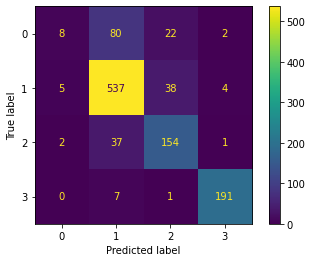

In [9]:
sklBoW.fitRandomForest(textsTreino, tagsTreino)
sklBoW.testRandomForest(textsTest, tagsTest)

score:      92.408%
              precision    recall  f1-score   support

           1       0.93      0.94      0.94       609
           2       0.81      0.79      0.80       176
           3       0.99      0.98      0.98       216

    accuracy                           0.92      1001
   macro avg       0.91      0.90      0.91      1001
weighted avg       0.92      0.92      0.92      1001



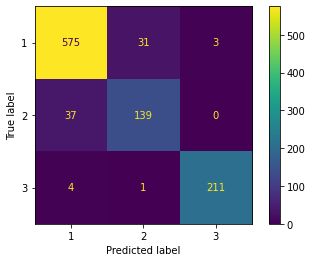

In [10]:
sklBoW.fitRandomForest(textsWOTreino, tagsWOTreino)
sklBoW.testRandomForest(textsWOTest, tagsWOTest)

In [11]:
textsTreino = []
tagsTreino = []
textsTest = []
tagsTest = []
textsWOTreino = []
tagsWOTreino = []
textsWOTest = []
tagsWOTest = []
dictDataframeTreino = {
    "tag": [],
    "text": [],
}

dictDataframeTeste = {
    "tag": [],
    "text": [], 
}

dictDataframeWithoutAnothersTreino = {
    "tag": [],
    "text": [],
}

dictDataframeWithoutAnothersTeste = {
    "tag": [],
    "text": [], 
}

dictFullframeTeste = {
    "tag": [],
    "text": [], 
}
dictFullWithoutAnothersframeTeste = {
    "tag": [],
    "text": [], 
}

In [12]:
for i in range (len(df_full.index)):
    tag = df_full.loc[i].iloc[1]
    tag = formatTag.get(tag, 0)
    
    text = df_full.loc[i].iloc[2]

    tokens = util.tokenize(text)

    dictFullframeTeste['tag'].append(tag)
    dictFullframeTeste['text'].append(tokens)
#    if tag != 0:
#        dictFullWithoutAnothersframeTeste['tag'].append(tag)
#        dictFullWithoutAnothersframeTeste['text'].append(tokens)

In [13]:

textsFullTest = []
tagsFullTest = []

for i in range (len(dictFullframeTeste['text'])):
    textsFullTest.append(text_to_vector(dictFullframeTeste['text'][i]))
    tagsFullTest.append(dictFullframeTeste['tag'][i])


In [14]:
print('teste Completo ' + str(len(tagsFullTest)))

teste Completo 34766


score:      91.791%
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       348
           1       0.94      0.95      0.95     25986
           2       0.82      0.83      0.82      6536
           3       0.91      0.97      0.94      1896

    accuracy                           0.92     34766
   macro avg       0.67      0.69      0.68     34766
weighted avg       0.91      0.92      0.91     34766



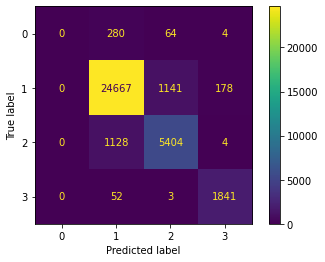

In [15]:
sklBoW.testRandomForest(textsFullTest, tagsFullTest)

In [16]:

textsFullTest = []
tagsFullTest = []
dictFullframeTeste = {
    "tag": [],
    "text": [], 
}

for i in range (len(df_full.index)):
    tag = df_full.loc[i].iloc[1]
    tag = formatTag.get(tag, 0)
    
    text = df_full.loc[i].iloc[2]

    tokens = util.tokenize(text)

    if tag != 0:
        dictFullWithoutAnothersframeTeste['tag'].append(tag)
        dictFullWithoutAnothersframeTeste['text'].append(tokens)

In [17]:
textsFullTest = []
tagsFullTest = []

for i in range (len(dictFullWithoutAnothersframeTeste['text'])):
    textsFullTest.append(text_to_vector(dictFullWithoutAnothersframeTeste['text'][i]))
    tagsFullTest.append(dictFullWithoutAnothersframeTeste['tag'][i])

score:      92.719%
              precision    recall  f1-score   support

           1       0.95      0.95      0.95     25986
           2       0.83      0.83      0.83      6536
           3       0.91      0.97      0.94      1896

    accuracy                           0.93     34418
   macro avg       0.90      0.92      0.91     34418
weighted avg       0.93      0.93      0.93     34418



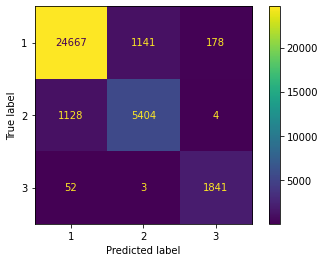

In [18]:
sklBoW.testRandomForest(textsFullTest, tagsFullTest)